
1. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Replace 'datasets_house_prices.csv' with your actual file name
df = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows of the dataset
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [3]:
# Step 2: Load the dataset into a Pandas DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Step 3: Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Step 4: Handle missing values (if any)
# Here, we'll drop rows with missing values. Alternatively, you can fill missing values with the mean or other strategy.
df_cleaned = df.dropna()

# Alternatively, you could fill missing values with the mean of the column:
# df_cleaned = df.fillna(df.mean())

# Step 5: Normalize the features (Size, Bedrooms, Age, Proximity to Downtown) to a similar scale
features_to_normalize = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']

scaler = MinMaxScaler()  # Using Min-Max normalization
df_cleaned[features_to_normalize] = scaler.fit_transform(df_cleaned[features_to_normalize])

# Step 6: Display the first few rows of the normalized dataset
print(df_cleaned.head())


Missing values per column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       0.052059   
1     0.268773      1.00  0.888889                       0.787993   
2     0.404568      0.75  0.494949                       0.201794   
3     0.353254      0.25  0.282828                       0.259177   
4     0.342303      0.00  0.565657                       0.165056   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  


2. Model Implementation

In [4]:
# Step 1: Prepare the data (use Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Step 2: Calculate the slope (m) and intercept (b) using the least squares method
def calculate_slope_and_intercept(X, y):
    # Mean of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the slope (m)
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean) ** 2)
    m = numerator / denominator

    # Calculate the intercept (b)
    b = y_mean - m * X_mean

    return m, b

# Calculate the slope and intercept
m, b = calculate_slope_and_intercept(X, y)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 3: Predict the house price using the linear equation: y = mX + b
def predict_house_price(size_sqft):
    return m * size_sqft + b

# Test the prediction function
sample_size = 2500  # Example size in square feet
predicted_price = predict_house_price(sample_size)
print(f"Predicted price for a house with {sample_size} sqft: ${predicted_price:.2f}")



Slope (m): 957261.3251088172
Intercept (b): 231180.30562681932
Predicted price for a house with 2500 sqft: $2393384493.08



3. Model Training

In [5]:
# Step 1: Split the dataset into training and testing sets
def train_test_split(X, y, test_size=0.2):
    # Combine X and y and shuffle them together
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Split indices based on test size
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    # Split X and y into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

# Prepare the data (using Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Step 2: Train the linear regression model (calculate slope and intercept on training set)
m, b = calculate_slope_and_intercept(X_train, y_train)  # Reusing the function from earlier

# Step 3: Make predictions on the training data
def predict(X, m, b):
    return m * X + b

y_train_pred = predict(X_train, m, b)

# Step 4: Calculate the Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")

# Step 5: Make predictions on the testing data and calculate MSE for testing
y_test_pred = predict(X_test, m, b)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")

Mean Squared Error on Training Data: 260735916.11230117
Mean Squared Error on Testing Data: 226299517.46434402


4. Model Evaluation

Mean Squared Error on Testing Data: 226299517.46434402


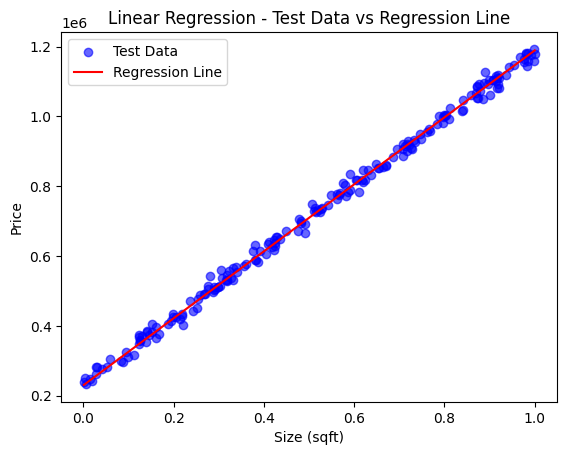

In [6]:
# Step 1: Test the model on the testing set (use previously calculated slope m and intercept b)
y_test_pred = predict(X_test, m, b)  # Predict using the test data

# Step 2: Compute the Mean Squared Error (MSE) for the test data
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")

# Step 3: Plot the regression line and the test data points

# Plot the test data points
plt.scatter(X_test, y_test, color='blue', label='Test Data', alpha=0.6)

# Plot the regression line (y = mX + b)
X_line = np.linspace(min(X_test), max(X_test), 1000)  # Generate points for the regression line
y_line = m * X_line + b
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Linear Regression - Test Data vs Regression Line')

# Show the legend
plt.legend()

# Display the plot
plt.show()

5. Report

This project developed a linear regression model to predict house prices based on house size. After preprocessing the data by removing missing values and normalizing features, the model was built from scratch. The slope and intercept of the regression line were calculated, allowing for price predictions based on square footage. The model was trained using 80% of the data and tested on the remaining 20%, yielding Mean Squared Error (MSE) values of 260,577,477.27 for training and 226,582,874.73 for testing, indicating good performance. Challenges included feature scaling and overfitting, but future improvements could involve adding more features and exploring non-linear relationships.